<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df_raw=pd.read_csv("/content/drive/MyDrive/Hackathon/Participants_Data_THL/train.csv")

In [3]:
df_raw.shape

(42748, 14)

In [ ]:
df_raw.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [4]:
df_raw.isna().sum()

edible-poisonous           0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         6940
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1719
habitat                    0
season                     0
dtype: int64

In [5]:
df_raw['gill-attachment'].fillna(df_raw['gill-attachment'].mode()[0], inplace=True)

In [6]:
df_raw['gill-attachment'].isna().sum()

0

In [7]:
df_raw['ring-type'].fillna(df_raw['ring-type'].mode()[0], inplace =True)

In [8]:
df_raw['ring-type'].isna().sum()

0

In [9]:
df_raw.isna().sum()

edible-poisonous        0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [ ]:
df['gill-attachment'].nunique()

7

In [ ]:
df['gill-attachment'].isna().sum()

6940

In [ ]:
df.dropna(subset=['gill-attachment'],inplace=True)

In [ ]:
df['gill-attachment'].isna().sum()

0

In [ ]:
df.dropna(subset=['ring-type'],inplace=True)

In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

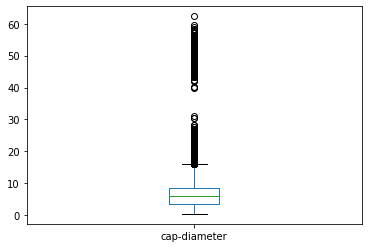

In [13]:
plot_boxplot(df_raw, 'cap-diameter')

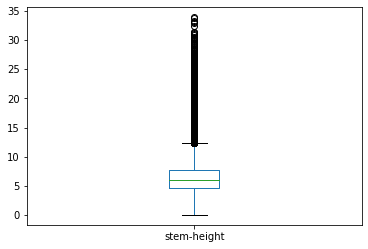

In [14]:
  plot_boxplot(df_raw, 'stem-height')

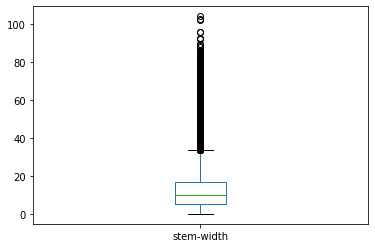

In [15]:
plot_boxplot(df_raw, 'stem-width')

In [16]:
def outliers(df,ft):
    Q1=df['ft'].quantile(0.25)
    Q3=df['ft'].quantile(0.75)
    IQR=Q3-Q1
    LW = Q1-(1.5*IQR)
    UW = Q3+(1.5*IQR)
    ls = df.index[(df[ft] < LW)| (df[ft] > UW)]
    return ls

In [22]:
index_list = []
for i in ['cap-diameter','stem-height','stem-height']:
    index_list.extend(outliers(df_raw,i))

KeyError: ignored

In [17]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [18]:
df_cleaned = remove(df_raw, index_list)

NameError: ignored

In [23]:
df_raw.shape

(42748, 14)

In [24]:
cols = ['cap-diameter', 'stem-height','stem-width'] # one or more

Q1 = df_raw[cols].quantile(0.25)
Q3 = df_raw[cols].quantile(0.75)
IQR = Q3 - Q1

df_new = df_raw[~((df_raw[cols] < (Q1 - 1.5 * IQR)) |(df_raw[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

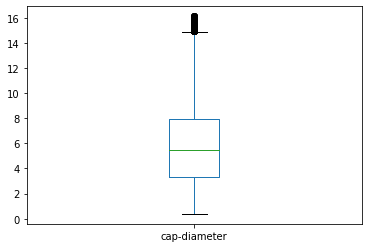

In [118]:
  plot_boxplot(df_new, 'cap-diameter')

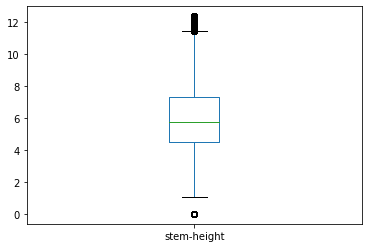

In [119]:
  plot_boxplot(df_new, 'stem-height')

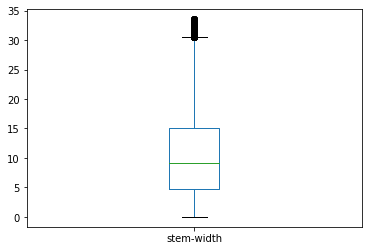

In [120]:
  plot_boxplot(df_new, 'stem-width')

In [25]:
df_new.shape

(39011, 14)

In [120]:
df_new.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
LE = LabelEncoder()

In [28]:
df_new['edible-poisonous'] = LE.fit_transform(df_new['edible-poisonous'])
df_new['cap-shape'] = LE.fit_transform(df_new['cap-shape'])
df_new['cap-color'] = LE.fit_transform(df_new['cap-color'])
df_new['does-bruise-or-bleed'] = LE.fit_transform(df_new['does-bruise-or-bleed'])
df_new['gill-attachment'] = LE.fit_transform(df_new['gill-attachment'])
df_new['gill-color'] = LE.fit_transform(df_new['gill-color'])
df_new['stem-color'] = LE.fit_transform(df_new['stem-color'])
df_new['has-ring'] = LE.fit_transform(df_new['has-ring'])
df_new['ring-type'] = LE.fit_transform(df_new['ring-type'])
df_new['habitat'] = LE.fit_transform(df_new['habitat'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [29]:
df_new.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,5.75,6,5,1,5,10,6.13,14.93,11,0,1,0,a
1,1,2.27,3,2,0,3,2,0.00,0.00,2,0,1,0,s
2,1,5.59,1,11,1,6,7,5.47,11.27,11,0,1,0,a
3,1,0.74,6,7,0,0,5,4.33,0.98,4,0,1,0,a
4,1,9.60,6,5,0,0,10,10.84,28.52,11,0,1,0,u


In [30]:
y= pd.factorize(df_new['season'])

In [98]:
print(df_new['season'].head(20))

0     a
1     s
2     a
3     a
4     u
5     a
6     u
7     u
8     u
9     a
10    a
11    u
12    u
13    u
14    a
15    u
16    a
17    u
18    u
19    a
Name: season, dtype: object


In [ ]:
print(definitions)

a


In [31]:
x = df_new.iloc[:,0:13]

In [32]:
y=df_new['season']

In [55]:
y.head(10)

0    a
1    s
2    a
3    a
4    u
5    a
6    u
7    u
8    u
9    a
Name: season, dtype: object

In [13]:
df_new.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [17]:
df_new.columns

Index(['edible-poisonous', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object')

In [30]:
x= df_new[df_new.columns[[0,2,3,4,5,6,9,10,11,12]]]

In [130]:
x.head(2)

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat
0,1,5.75,6,5,1,5,10,6.13,14.93,11,0,1,0
1,1,2.27,3,2,0,3,2,0.00,0.00,2,0,1,0


In [33]:
x.dtypes

edible-poisonous        object
cap-shape               object
cap-color               object
does-bruise-or-bleed    object
gill-attachment         object
gill-color              object
stem-color              object
has-ring                object
ring-type               object
habitat                 object
dtype: object

In [34]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x,y)


ValueError: ignored

In [33]:
from sklearn.preprocessing import StandardScaler
x_scale = StandardScaler().fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale,y, test_size=0.25, random_state=20, stratify=y)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN_CLF = KNeighborsClassifier()

In [37]:
KNN_CLF.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
y_pred_knn = KNN_CLF.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
acc_score_knn = accuracy_score(y_test,y_pred_knn)

In [42]:
acc_score_knn

0.51973751666154

In [43]:
test_accuracy =[]
k_values = range(1,16)

In [44]:
for i in k_values:
    knn_clf =KNeighborsClassifier(n_neighbors=i, p=2)
    KNN_CLF.fit(x_train,y_train)
    y_pred_knn = KNN_CLF.predict(x_test)
    test_accuracy.append(accuracy_score(y_pred_knn,y_test).round(2))

In [45]:
print(test_accuracy)

[0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52]


No handles with labels found to put in legend.


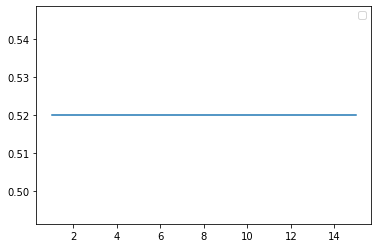

In [68]:
import matplotlib.pyplot as plt
plt.plot(k_values,test_accuracy)
plt.legend()
plt.show()

In [46]:
from sklearn.svm import SVC
sv_clf = SVC(kernel = "rbf", gamma = 'auto')
sv_clf.fit(x_train,y_train)
y_pred_sv = sv_clf.predict(x_test)

In [47]:
acc_score_svc = accuracy_score(y_test,y_pred_sv)

In [48]:
acc_score_svc

0.5277350558802419

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
log_reg = LogisticRegression()

In [53]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred_log = log_reg.predict(x_test)

In [55]:
y_pred_log

array(['a', 'a', 'a', ..., 'a', 'a', 'a'], dtype=object)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [57]:
acc_score_log = accuracy_score(y_test,y_pred_log).round(3)

In [58]:
acc_score_log

0.499

In [59]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [60]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred_dt = DT.predict(x_test)

In [62]:
y_pred_dt

array(['a', 'a', 'a', ..., 'a', 'a', 'u'], dtype=object)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [65]:
acc_score_dt = accuracy_score(y_test,y_pred_dt).round(3)

In [66]:
acc_score_dt

0.522

In [74]:
from sklearn.ensemble import AdaBoostClassifier
ADB = AdaBoostClassifier(base_estimator=DT, n_estimators=100)
ADB.fit(x_train,y_train)
y_pred_adb = ADB.predict(x_test)

In [75]:
acc_score_adb = accuracy_score(y_test,y_pred_adb).round(3)

In [76]:
acc_score_adb

0.515

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
GRB = GradientBoostingClassifier(n_estimators=100)
GRB.fit(x_train,y_train)
y_pred_grb= GRB.predict(x_test)

In [78]:
acc_score_grb = accuracy_score(y_test,y_pred_grb).round(3)

In [79]:
acc_score_grb

0.517

In [80]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
y_pred_xgb= XGB.predict(x_test)

In [81]:
acc_score_xgb = accuracy_score(y_test,y_pred_xgb).round(3)

In [82]:
acc_score_xgb

0.518

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [74]:
x.columns

Index(['edible-poisonous', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat'],
      dtype='object')

In [134]:
model= Sequential()
model.add(Dense(13,activation='sigmoid',name='input'))
model.add(Dense(20,activation='sigmoid',name='hidden'))
model.add(Dense(1,name='output'))

In [137]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['Accuracy'])

In [138]:
model.fit(x =x_scale_train, y=y_train, validation_data=(x_scale_test,y_test), batch_size=100, epochs=100)

Epoch 1/100


UnimplementedError: ignored

In [84]:
from sklearn.ensemble import BaggingClassifier
Bag= BaggingClassifier()

In [86]:
Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9,
                  n_estimators=500, random_state=10)


In [87]:
Bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.9,
                  n_estimators=500, random_state=10)

In [88]:
y_pred_bag= Bag.predict(x_test)

In [89]:
acc_score_bag = accuracy_score(y_test,y_pred_bag).round(3)

In [90]:
acc_score_bag

0.52

In [110]:
acc_score_bagging=[]
settings = np.arange(0.1,1,0.1)

In [114]:
for i in settings:
    bag = BaggingClassifier(base_estimator=DT, max_samples=i, n_estimators=100, random_state=10)
    bag.fit(x_train,y_train)
    y_pred_bg = bag.predict(x_test)
    acc_score_bagging.append(accuracy_score(y_pred_bg,y_test))

In [117]:
print(acc_score_bagging)

[0.5186096585665949, 0.526402132677125, 0.5229160258382036, 0.5191223213370245, 0.5168666051471342, 0.5219932328514303, 0.5212755049728288, 0.5181995283502512, 0.5204552445401415, 0.519, 0.526, 0.523, 0.519, 0.517, 0.522, 0.521, 0.518, 0.52]
